In [74]:
import numpy as np
import pandas as pd

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [75]:
df=pd.read_csv("players_20.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sofifa_id,18278,NaN,NaN,NaN,219739,27960.2,768,204446,226165,240796,252905
player_url,18278,18278,https://sofifa.com/player/211269/guillermo-fer...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
short_name,18278,17354,J. Rodríguez,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
long_name,18278,18218,Liam Kelly,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,18278,NaN,NaN,NaN,25.2833,4.65696,16,22,25,29,42
...,...,...,...,...,...,...,...,...,...,...,...
lb,16242,96,61+2,667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lcb,16242,110,63+2,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cb,16242,110,63+2,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rcb,16242,110,63+2,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
print(df.columns.values)

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club' 'overall' 'potential' 'value_eur'
 'wage_eur' 'player_positions' 'preferred_foot' 'international_reputation'
 'weak_foot' 'skill_moves' 'work_rate' 'body_type' 'real_face'
 'release_clause_eur' 'player_tags' 'team_position' 'team_jersey_number'
 'loaned_from' 'joined' 'contract_valid_until' 'nation_position'
 'nation_jersey_number' 'pace' 'shooting' 'passing' 'dribbling'
 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_reflexes'
 'gk_speed' 'gk_positioning' 'player_traits' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'po

<AxesSubplot:>

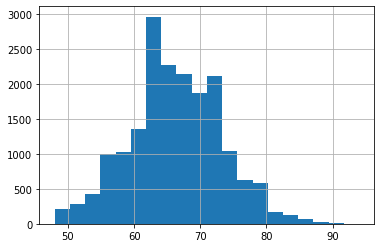

In [78]:
df.overall.hist(bins = 20)

In [79]:
skill_columns = ['pace', 'shooting', 'passing', 'dribbling',
 'defending', 'physic', 'attacking_crossing',
 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
 'movement_agility', 'movement_reactions', 'movement_balance',
 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
 'mentality_composure', 'defending_marking', 'defending_standing_tackle',
 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

gk_only = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

In [80]:
df_n = df[df['overall']>70]
df_skills = df_n[skill_columns+gk_only]
df_skills.fillna(0, inplace=True)

Hay variables de skill que parecen repetidas, vemos como se distribuyen los valores:

In [81]:
df_skills.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
pace,4756.0,63.439655,23.394975,0.0,59.0,70.0,77.0,96.0
shooting,4756.0,55.596930,21.908481,0.0,47.0,63.0,71.0,93.0
passing,4756.0,59.970143,20.877832,0.0,58.0,66.0,72.0,92.0
dribbling,4756.0,63.814971,22.117206,0.0,63.0,71.0,76.0,96.0
defending,4756.0,52.697855,23.853588,0.0,36.0,63.0,72.0,90.0
physic,4756.0,63.796047,21.837668,0.0,63.0,70.0,76.0,90.0
attacking_crossing,4756.0,58.254205,19.050531,6.0,49.0,65.0,72.0,93.0
attacking_finishing,4756.0,54.047729,20.475484,5.0,40.0,60.0,70.0,95.0
attacking_heading_accuracy,4756.0,59.440706,18.234264,7.0,52.0,64.0,72.0,93.0
attacking_short_passing,4756.0,67.692178,13.736390,11.0,66.0,71.0,75.0,92.0


<AxesSubplot:xlabel='defending', ylabel='attacking_finishing'>

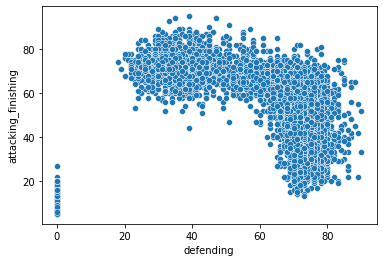

In [82]:
x = skill_columns[4]
y = skill_columns[7]
sns.scatterplot(data=df_skills, x=x, y=y)

In [83]:
from sklearn.cluster import KMeans,MeanShift, DBSCAN,  estimate_bandwidth, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

In [84]:
normalize = Normalizer()
scaler = StandardScaler()
minmax = MinMaxScaler()

df_scaler = scaler.fit_transform(df_skills)
df_norm = normalize.fit_transform(df_skills)
df_minmax = minmax.fit_transform(df_skills)

In [85]:
# Número de clusters buscado
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]
scores2 = [KMeans(n_clusters=i+2).fit(df_norm).inertia_ for i in range(10)]
scores3 = [KMeans(n_clusters=i+2).fit(df_scaler).inertia_ for i in range(10)]
scores4 = [KMeans(n_clusters=i+2).fit(df_minmax).inertia_ for i in range(10)]

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

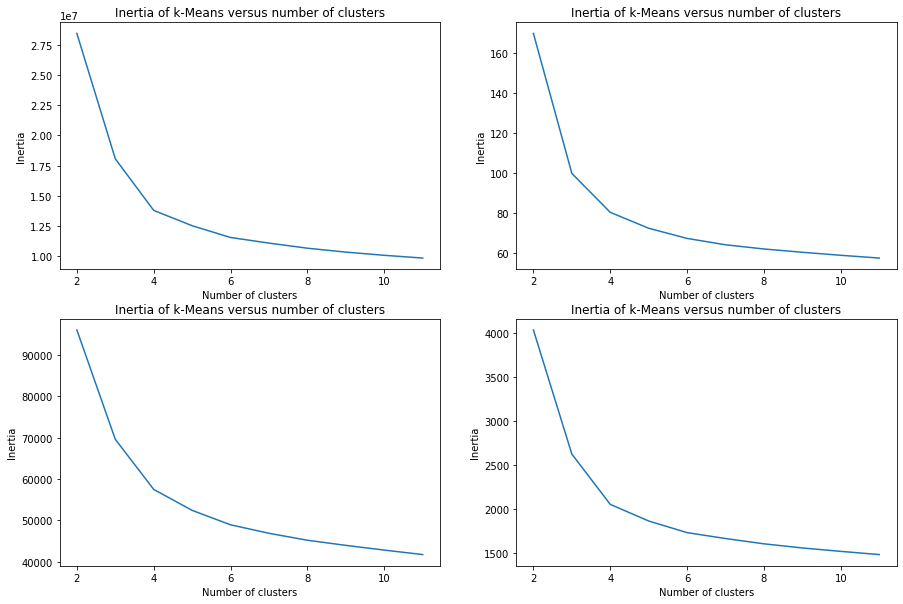

In [87]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.subplot(2,2,2)
plt.plot(np.arange(2, 12), scores2)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.subplot(2,2,3)
plt.plot(np.arange(2, 12), scores3)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.subplot(2,2,4)
plt.plot(np.arange(2, 12), scores4)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [88]:
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  12518167.691673031


In [89]:
bandwidth = estimate_bandwidth(df_minmax, quantile=0.1, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_minmax)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 2


In [90]:
dbscan = DBSCAN(eps=0.005)
dbscan.fit(df_minmax)
cluster3 = dbscan.labels_

labels_unique = np.unique(cluster3)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 1


In [91]:
n_clusters = 5

ward = AgglomerativeClustering(linkage='ward')
ward.fit(df_skills)
cluster4 = ward.labels_

print("Numero estimado de clusters para ward : %d" % ward.n_clusters_)

Numero estimado de clusters para ward : 2


In [92]:
gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(df_skills)
pred = gmm.predict(df_skills)

Text(0.5, 1.0, 'Jugadores agrupados por cluster WARD')

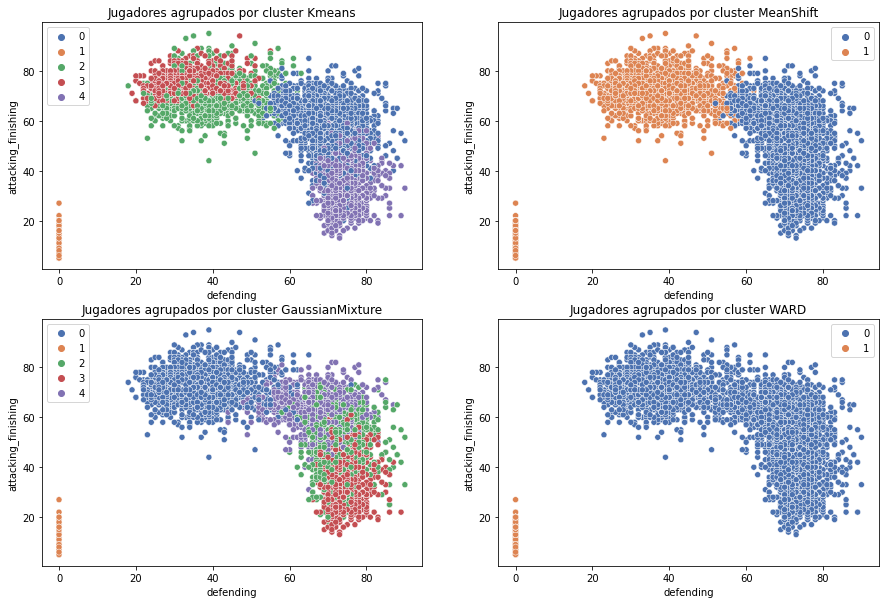

In [93]:
skill_1=skill_columns[4]
skill_2=skill_columns[7]

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=clusters, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster Kmeans")
plt.subplot(2,2,2)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=clusters2, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster MeanShift")
plt.subplot(2,2,3)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=pred, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster GaussianMixture")
plt.subplot(2,2,4)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=cluster4, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster WARD")

In [94]:
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW','CF']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

In [95]:
df0 = df_n[clusters==0]
df1 = df_n[clusters==1]
df2 = df_n[clusters==2]
df3 = df_n[clusters==3]
df4 = df_n[clusters==4]

In [96]:
df0[positions].ls.unique()

array(['69+3', '77+3', '72+3', '74+3', '70+3', '81+3', '75+3', '65+2',
       '66+3', '68+3', '76+3', '71+3', '64+3', '74+2', '67+3', '81+2',
       '73+2', '80+3', '73+3', '71+2', '79+2', '76+2', '79+3', '82+3',
       '77+2', '78+2', '68+2', '78+3', '69+2', '72+2', '70+2', '75+2',
       '62+2', '65+3', '66+2', '67+2', '64+2', '60+3', '62+3', '61+2',
       '63+2', '57+2', '63+3', '61+3', '58+2', '60+2', '59+2', '55+2',
       '56+2', '52+2', '54+2', '53+2', '59+3'], dtype=object)